# Exploring the tmdb-movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Movies have been a great part of our lives and how can you tell a successful movie from unsuccessful ones? Or, how can you tell if some genres are more favorable than others? 
> The "tmdb-movies.csv" data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> By exploring this data set, some of the interesting questions about movies can be unwinded.


> If I was a film production company, I would be interested in knowing which genres are on trend, and which directors would make the most profitable movies in order to produce my next movie.


> In this project, I will investigate:
> 1) The movie genres trend over time, 
> and 2) Top directors worth hiring

> I will be using the following data:
> Genre,
> Release year,
> Director,
> Revenue,
> and Profit

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [102]:
import pandas as pd
import numpy as np
import collections as cl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

df = pd.read_csv('tmdb-movies.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Cleaning

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [104]:
# Fill in missing values
df.fillna('None')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

<a id='eda'></a>
## Exploratory Data Analysis

### How has the movie genres trend had changed from 1960 to 2015? 

In [105]:
# add release year to the new data frame df_genre_year
df_genre_year = df
df_genre_year['release_year'] = df['release_year']

In [106]:
# sepeare the genre types in each row
df_genre = df['genres'].str.split('|',expand=True)
df_genre = df_genre.rename(columns={0:'genre1', 1:'genre2', 2:'genre3', 3:'genre4', 4:'genre5'})

In [107]:
# assign 
df_genre_year = df_genre_year.sort_values(by='release_year', ascending=True)
df_genre_year = df_genre_year.set_index('release_year')
df_genre_year.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,,,,,,
1960,1941,tt0053804,0.256779,0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,NaN,Otto Preminger,NaN,israel|jewry|middle east conflict|epic,The theme is the founding of the state of Isra...,208,Action|Drama|History|War,Carlyle Productions,3/27/60,14,6.1,0.000000e+00,0.000000e+00
1960,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,hotel|clerk|arizona|shower|rain,When larcenous real estate clerk Marion Crane ...,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,5.949601e+06,2.359350e+08
1960,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,NaN,John Sturges,They were seven - And they fought like seven h...,horse|village|friendship|remake|number in title,An oppressed Mexican peasant village hires sev...,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1.474593e+07,3.616441e+07
1960,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,gladiator|roman empire|gladiator fight|slavery...,Spartacus is a 1960 American historical drama ...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,8.847561e+07,4.423780e+08
1960,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,NaN,Billy Wilder,"Movie-wise, there has never been anything like...",new york|new year's eve|lovesickness|age diffe...,Bud Baxter is a minor clerk in a huge New York...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,2.211890e+07,1.843242e+08


In [108]:
# create a dummy dataframe
# An audacity mentor helped me with this step
base = df.genres.str.get_dummies(sep='|')
base['year'] = df['release_year']
# count the total number a genre occurs in a year
base = base.groupby('year').sum()
base

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1
1965,9,6,1,7,2,0,20,3,0,1,4,5,2,3,5,2,1,11,8,4
1966,14,11,3,16,5,1,16,7,2,2,2,3,0,6,6,6,0,8,4,7
1967,7,7,2,17,7,1,16,3,3,0,0,4,5,3,11,4,0,5,1,2
1968,6,5,3,9,5,0,20,5,5,0,3,4,3,4,6,4,0,5,4,1


In [109]:
base.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,42.589286,26.267857,12.482143,67.732143,24.196429,9.285714,85.017857,21.982143,16.357143,3.357143,5.964286,29.232143,7.285714,14.464286,30.571429,21.964286,2.982143,51.928571,4.821429,2.946429
std,35.981195,21.096739,15.142944,59.957710,19.569382,17.247624,78.753815,20.073040,14.238780,4.768947,4.895134,30.901010,7.581591,12.575538,26.782530,19.393499,4.300068,51.350793,4.204358,2.186069
min,4.000000,5.000000,0.000000,5.000000,2.000000,0.000000,13.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,12.500000,7.750000,2.000000,13.000000,7.750000,0.750000,21.750000,4.000000,3.000000,0.000000,3.000000,8.750000,2.750000,5.000000,6.750000,6.000000,0.000000,15.250000,2.000000,1.000000
50%,32.500000,18.500000,4.500000,52.500000,19.500000,2.000000,53.000000,14.500000,14.000000,1.000000,4.000000,18.000000,4.000000,9.000000,21.500000,18.000000,1.000000,30.500000,4.000000,3.000000
75%,63.250000,40.250000,21.500000,101.750000,35.250000,6.250000,110.750000,36.000000,23.250000,4.000000,8.000000,29.250000,10.250000,22.500000,48.250000,28.250000,3.500000,67.750000,6.250000,4.000000
max,129.000000,72.000000,50.000000,198.000000,71.000000,73.000000,284.000000,72.000000,49.000000,18.000000,24.000000,125.000000,33.000000,51.000000,85.000000,86.000000,20.000000,179.000000,23.000000,8.000000


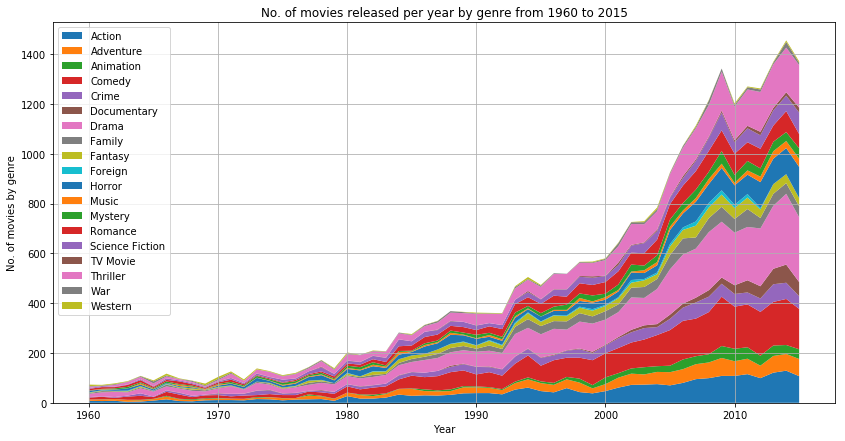

In [110]:
# create a visualization with stacked bar chart
plt.figure(figsize=(14,7))
# Use base.index as x axis
x = base.index
y = [base['Action'],base['Adventure'],base['Animation'],base['Comedy'],base['Crime'],base['Documentary'],base['Drama'],base['Family'],base['Fantasy'],base['Foreign'],base['Horror'],base['Music'],base['Mystery'],base['Romance'],base['Science Fiction'],base['TV Movie'],base['Thriller'],base['War'],base['Western']]
plt.xlabel("Year")
plt.ylabel("No. of movies by genre")
plt.title("No. of movies released per year by genre from 1960 to 2015")
plt.stackplot(x,y)
plt.legend(['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'],loc ='upper left')
plt.grid()

### Which director makes the highest profit on average?

In [124]:
# create a profil column with profit = revenue - budget
df['profit'] = df['revenue'] - df['budget']

In [125]:
# calculate the average budget, revenue and profit made by each director
df_profit = df.groupby(['director']).mean()[['budget', 'revenue', 'profit']]

In [128]:
# View the top 10 profitable directors
df_profit = df_profit.sort_values(by=['profit'], ascending=False).head(10)

In [129]:
df_profit

,budget,revenue,profit
director,,,
Kyle Balda|Pierre Coffin,74000000.0,1.156731e+09,1.082731e+09
Lee Unkrich,200000000.0,1.063172e+09,8.631719e+08
Andrew Stanton|Lee Unkrich,94000000.0,8.646260e+08,7.706260e+08
Andrew Adamson|Kelly Asbury|Conrad Vernon,150000000.0,9.198388e+08,7.698388e+08
Roger Allers|Rob Minkoff,45000000.0,7.882418e+08,7.432418e+08
Pierre Coffin|Chris Renaud,72500000.0,7.571379e+08,6.846379e+08
Colin Trevorrow,75375000.0,7.587683e+08,6.833933e+08
Pete Docter,175000000.0,8.537086e+08,6.787086e+08
David Yates,155000000.0,8.308591e+08,6.758591e+08


In [130]:
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Kyle Balda|Pierre Coffin to Chris Miller|Raman Hui
Data columns (total 3 columns):
budget     10 non-null float64
revenue    10 non-null float64
profit     10 non-null float64
dtypes: float64(3)
memory usage: 320.0+ bytes


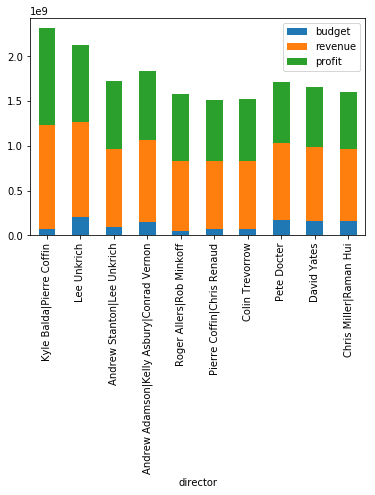

In [131]:
df_profit.plot.bar(stacked=True)

<a id='conclusions'></a>
## Conclusions

#### Research question 1 "How has the movie genres trend had changed from 1960 to 2015? " result:

All genres have more movies released over the year. The total number of movies of all genres in 1960 is around 100 movies compared to over 1450 movies in 2015 which is 14.5 times higher.

The number of movies released had increased steadily over the years but rocketed from 2000.

Drama, Romance and Thriller have the highest number of movies released throughout decades,
while TV Shows, Western and War have the lowest number of movies released throughout decades.

The safe strategy for film production companies is to make more movies in the three genres 'Drama', 'Romance' and 'Thriller', but if film producion firms want to mine less compatitive

A limitation of this analysis is the data set does not provide the view rate of each genre over the years. While the number of movies produced in that genre indicates the production trend, the view rate of each genre would help indicate the consumers' tastes in genres.

For futher exploration, we can add the popularity as a baseline to compare each genre popularity over the years, along with their volumes.

#### Research question 2 "Which director makes the highest profit on average?" result:

Movies co-directed by Kyle Balda and Pierre Coffin results profits the most with over $1.08 billion USD.

Come second are movies directed by Lee Unkrich with over $863 million USD in profit.

Movies co-directed by Andrew Stanton & Lee Unkrich, Andrew Adamson & Kelly Asbury & Conard Vemon, Roger Allers & Rob Minkoff brought a profit of $770, $769 and $748 million USD respectively.

Lastly on the top list are Colin Trevorrow, Pete Docter, David Yates, Chris Miller & Raman Hui's movies with $684, $683, $677, $675, and $638 million USD respectively.

Film production firms would want to hire the directors on this list to make a high return on investment for the next movie.

A limitation to this analysis is director is not the only factor that contributes to the success of a moview.

For further exploration, we can take a look at the cast and runtime to see if there would be asignificant changes in moview profits

In [117]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0